In [1]:
pip install pandas numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("../data/model_scores.csv")
df


,Text,Model,P1,P2,P3,P4,P5,P6
0,T1,M1,8.8,8.5,8.4,8.6,3.5,3.8
1,T1,M2,9.0,9.2,8.9,9.1,8.8,8.6
2,T1,M3,6.5,6.8,6.4,6.2,4.5,4.7
3,T1,M4,8.0,7.8,7.6,7.9,6.8,6.6
4,T2,M1,7.2,7.0,7.1,7.0,4.0,4.2
5,T2,M2,9.7,9.8,9.6,9.9,9.0,8.9
6,T2,M3,6.0,6.2,6.1,5.9,4.8,5.0
7,T2,M4,8.5,8.3,8.4,8.6,6.9,6.8
8,T3,M1,6.8,7.0,6.7,6.6,5.5,5.6
9,T3,M2,7.5,7.8,7.6,7.7,8.0,7.8


In [4]:
weights = np.array([0.2, 0.15, 0.2, 0.2, 0.15, 0.1])
benefit = [True, True, True, True, False, False]


In [5]:
def apply_topsis(sub_df):
    criteria = sub_df.iloc[:, 2:]
    norm = criteria / np.sqrt((criteria**2).sum())
    weighted = norm * weights

    ideal_best = []
    ideal_worst = []

    for i in range(len(benefit)):
        if benefit[i]:
            ideal_best.append(weighted.iloc[:, i].max())
            ideal_worst.append(weighted.iloc[:, i].min())
        else:
            ideal_best.append(weighted.iloc[:, i].min())
            ideal_worst.append(weighted.iloc[:, i].max())

    dist_best = np.sqrt(((weighted - ideal_best)**2).sum(axis=1))
    dist_worst = np.sqrt(((weighted - ideal_worst)**2).sum(axis=1))

    closeness = dist_worst / (dist_best + dist_worst)

    sub_df["Topsis Score"] = closeness
    sub_df["Rank"] = closeness.rank(ascending=False)

    return sub_df


In [6]:
final_results = []

for text in df["Text"].unique():
    temp = df[df["Text"] == text].copy()
    temp = apply_topsis(temp)
    final_results.append(temp)

final_df = pd.concat(final_results)
final_df


,Text,Model,P1,P2,P3,P4,P5,P6,Topsis Score,Rank
0,T1,M1,8.8,8.5,8.4,8.6,3.5,3.8,0.888929,1.0
1,T1,M2,9.0,9.2,8.9,9.1,8.8,8.6,0.451233,3.0
2,T1,M3,6.5,6.8,6.4,6.2,4.5,4.7,0.490356,2.0
3,T1,M4,8.0,7.8,7.6,7.9,6.8,6.6,0.450383,4.0
4,T2,M1,7.2,7.0,7.1,7.0,4.0,4.2,0.535280,3.0
5,T2,M2,9.7,9.8,9.6,9.9,9.0,8.9,0.563303,2.0
6,T2,M3,6.0,6.2,6.1,5.9,4.8,5.0,0.391679,4.0
7,T2,M4,8.5,8.3,8.4,8.6,6.9,6.8,0.567321,1.0
8,T3,M1,6.8,7.0,6.7,6.6,5.5,5.6,0.370747,2.0
9,T3,M2,7.5,7.8,7.6,7.7,8.0,7.8,0.242485,4.0


In [8]:
final_df.to_csv("../output/topsis_table.csv", index=False)


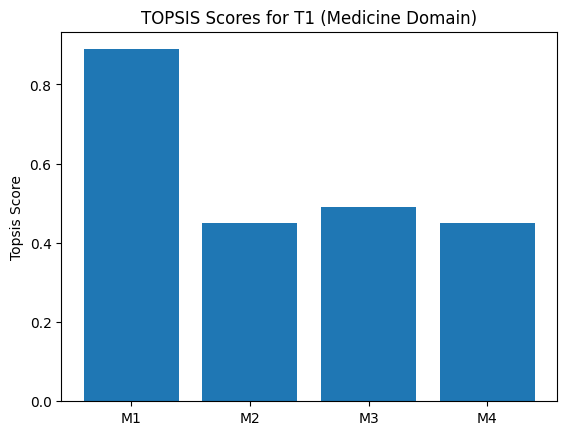

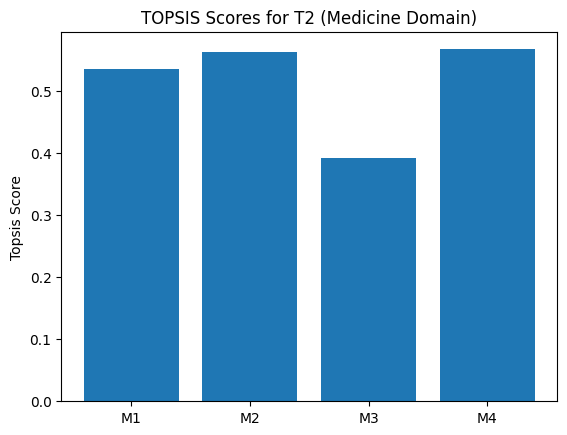

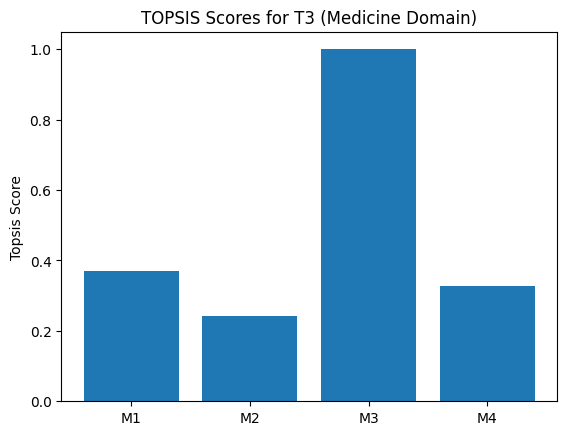

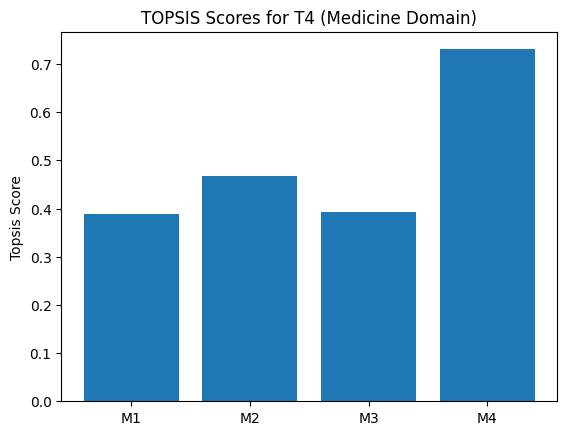

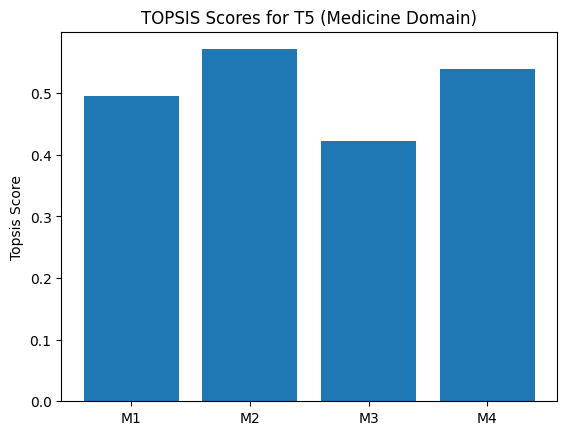

In [10]:
for text in final_df["Text"].unique():
    temp = final_df[final_df["Text"] == text]
    plt.figure()
    plt.bar(temp["Model"], temp["Topsis Score"])
    plt.title(f"TOPSIS Scores for {text} (Medicine Domain)")
    plt.ylabel("Topsis Score")
    plt.savefig(f"../output/{text}_scores.png")
    plt.show()
